**<font size=6>线性回归</font>**

**<font size=5>一、线性回归简介</font>**

1. 一般的，线性模型通过计算输入特征的加权总和，再加上一个常数项，来预测数据

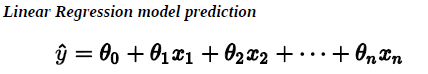

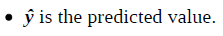

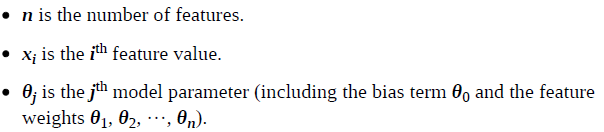

2. 可以使用矢量化形式编写：
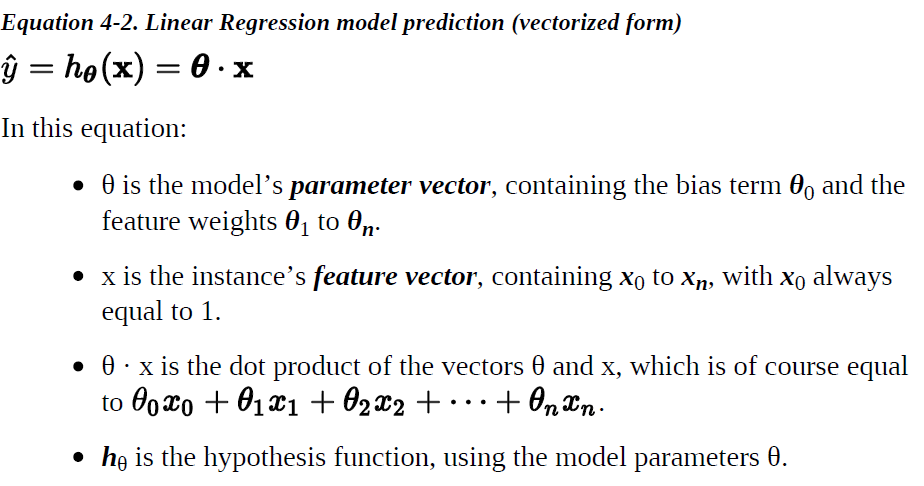

3. 通常在机器学习中，向量使用列向量表示：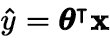此时θ.T是θ的转置

如果X是列向量，则通过点积得到预测值；<br>
如果X是矩阵，则通过矩阵乘法得到一系列预测值

4. 训练模型首先意味着为模型设定参数，使得其在训练集上表现最佳。为了达到这一目的，需要衡量模型拟合数据的好坏程度。对于回归模型，最常见的指标就是均方根误差(RMSE),因此要训练线性回归模型，需要找到使得RMSE最小的θ值。实际上，使用均方误差MSE就可以解决问题。RMSE是MSE的开根结果
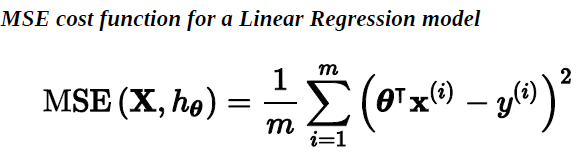

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

**<font size=4>1. 使用公式直接计算最合适的模型参数（通过最小化训练集上的代价函数）</font>**

为了找到使成本函数最小的θ值，有一个封闭形式的解决方案，也就是一个直接给出结果的数学方程式。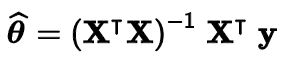

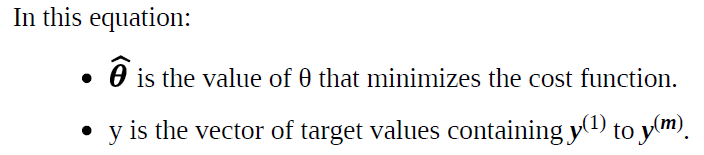

In [3]:
X = 2 * np.random.rand(100,1)

In [4]:
y = 4 + 3*X + np.random.randn(100,1)

In [5]:
X.shape, y.shape

((100, 1), (100, 1))

也就是生成了一个y = 4 + 3 * X + noise的目标数据

Text(0.5,1,'Linear Model data')

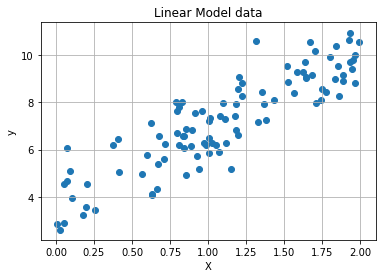

In [6]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.title("Linear Model data")

X和y是正相关的，不是正比例的。因为正比例需要经过原点

数据中存在噪声，而噪声的估计可以考虑置信区间。

**<font size=4>1.1使用线性代数方法</font>**

使用NumPy的线性代数模块（np.linalg）中的inv（）函数来计算矩阵的逆，并使用dot（）方法进行矩阵乘法：

<font color="red">首先为特征向量加上一个恒为1的常数值</font>

In [7]:
X_b = np.c_[np.ones((100,1)), X]

计算最佳参数

In [8]:
theta_best_normal_equation = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_best_normal_equation

array([[3.74711212],
       [3.15528998]])

利用找到的参数值预测数据

In [10]:
X_new = np.array([[0], [2]])

In [11]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [12]:
y_predict = theta_best_normal_equation.T.dot(X_new_b.T)

In [13]:
y_predict

array([[ 3.74711212, 10.05769207]])

In [14]:
y_predict = X_new_b.dot(theta_best_normal_equation)

In [15]:
y_predict

array([[ 3.74711212],
       [10.05769207]])

Text(0.5,1,'Linear Model data')

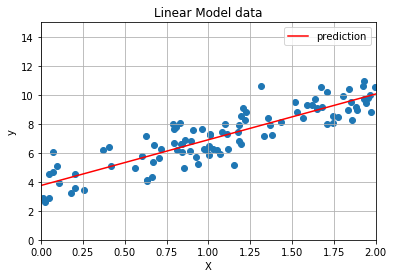

In [16]:
plt.plot(X_new, y_predict, color="red", label="prediction")
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.axis([0,2, 0, 15])
plt.grid()
plt.legend()
plt.title("Linear Model data")

**<font size=4>1.2使用机器学习中的线性回归模型</font>**

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lin_reg = LinearRegression()

In [19]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

使用intercept_属性获取截距，也就是常数值b

In [20]:
lin_reg.intercept_

array([3.74711212])

使用coef_属性获取系数，也就是θ值

In [21]:
lin_reg.coef_

array([[3.15528998]])

对新数据进行预测，可以发现和刚刚使用线性代数方法计算的结果一样

In [22]:
lin_reg.predict(X_new)

array([[ 3.74711212],
       [10.05769207]])

线性回归基于scipy.linalg.lstsq()函数，可以直接调用。lstsq是leastSquares的缩写，即最小二乘法

In [23]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [24]:
theta_best_svd

array([[3.74711212],
       [3.15528998]])

可以直接利用伪逆求解：利用np.linalg.pinv()计算伪逆，pseudoinverse
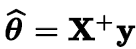

In [25]:
np.linalg.pinv(X_b).dot(y)

array([[3.74711212],
       [3.15528998]])

伪逆本身是使用称为奇异值分解（SVD）的标准矩阵分解技术计算的，该技术可以将训练集矩阵X分解为三个矩阵UΣV的矩阵乘法（请参阅numpy.linalg.svd（））。X的伪逆就按照下列公式计算：

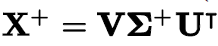

这种方法比计算正规方程更有效，而且可以很好地处理边缘情况：的确，如果矩阵X.T * X是不可逆的（即，奇异的），例如m <n或某些特征是多余的，导致正规矩阵无法计算，但是伪逆依旧可以计算。

**计算复杂度分析**

正规方程计算X.T * X的逆，即(n+1)×(n+1)矩阵（其中n是特征数）。

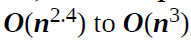


Scikit-Learn的LinearRegression类使用的SVD方法的计算复杂度：
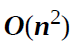

**<font color="red">缺点：</font>**<br>
当特征数量变大（例如100,000）时，法线方程和SVD方法都变得非常慢。 从积极的一面来看，两者均与训练集中的实例数（它们为O（m））呈线性关系，因此，只要它们适合内存，它们就可以有效地处理大型训练集。

**<font color="red">优点</font>**<br>
此外，一旦您训练了线性回归模型（使用正规方程式或任何其他算法），预测就非常快：关于要进行预测的实例数量和特征数量的计算复杂度都是线性的 。 换句话说，对两倍实例（或两倍特征）进行预测将花费大约两倍的时间。

**<font size=4>1.3在训练集上使用梯度下降，逐步调整参数以最小化代价函数，最终收敛到一组参数值</font>**

**<font color="red">优点：</font>**<br>
适用于特征多、实例数较多的数据

梯度下降是一种通用的优化算法，能够找到针对各种问题的最佳解决方案。梯度下降的一般思想是迭代地调整参数，以最小化代价函数。

假设身处迷雾笼罩的山顶，只能感觉到脚下的地面倾斜。快速到达山谷底部的一个好策略是沿着最陡的山坡方向下坡。这正是“梯度下降”的做法：它测量误差函数相对于参数矢量θ的局部梯度，并沿梯度下降的方向移动。一旦梯度为零，就达到了最小值！

具体而言，首先用随机值填充θ（这称为随机初始化）。然后逐步改善它，一次迈出一小步，每一步都试图降低成本函数（例如MSE），直到算法收敛到局部最小值
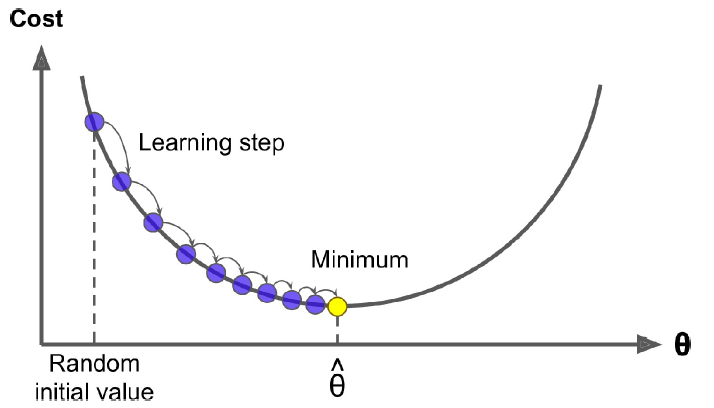

梯度下降中的一个重要参数是步长，由学习速率超参数确定。如果学习率太小，则该算法将必须经过许多次迭代才能收敛，这将花费很长时间：
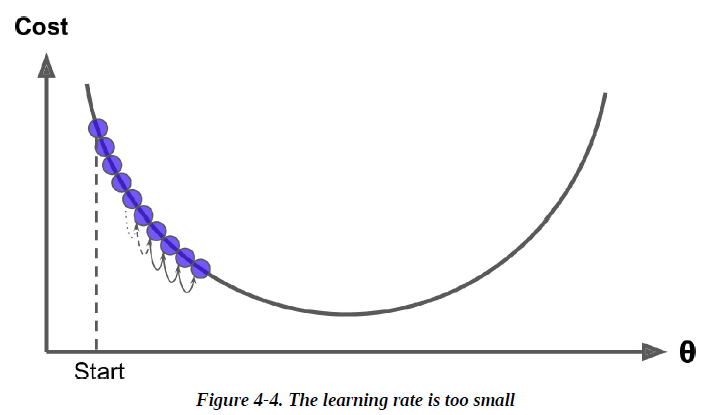

另一方面，如果学习率太高，您可能会越过局部最优点并到达另一侧，甚至可能比以前更高。这可能会使算法随着θ值越来越大而发散，无法找到一个好的解决方案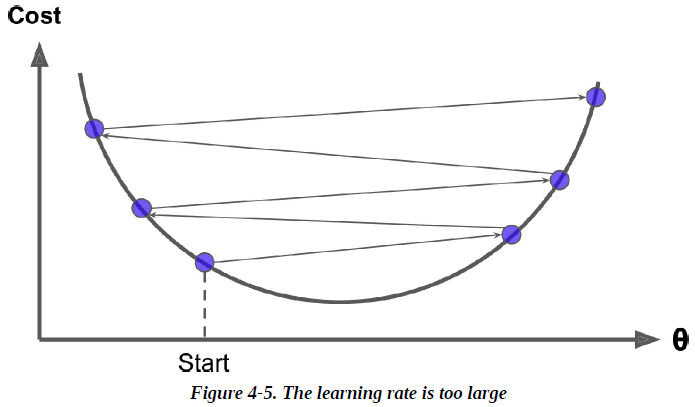

最后，并非所有代价函数的图像看起来都像是一个碗。可能会有孔、脊、高原和各种不规则的图像，使得算法难以收敛到最小值。

**梯度下降的两个主要挑战**

如果随机初始化从左侧开始算法，则它将收敛到局部最小值，不如全局最小值好。如果从右边开始，那么穿越高原将需要很长时间。而且，如果停得太早，将永远无法达到全局最低点。
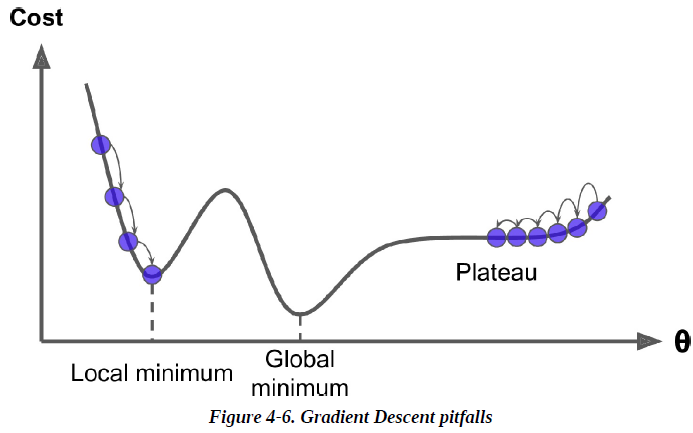

幸运的是，线性回归模型的MSE代价函数恰好是凸函数，这意味着如果选择曲线上的任意两个点，则连接它们的线段将永远不会穿过曲线。这意味着没有局部最小值，**<font color="red">只有一个全局最小值</font>**。 它也是**<font color="red">连续</font>**的函数，其斜率永远不会突然变化。这两个事实有很大的关系：保证梯度下降可以任意接近全局最小值（如果您等待足够长的时间并且学习率不太高）。

实际上，代价函数具有碗的形状，但是如果特征具有非常不同的比例，则它可以是细长的碗。 图显示了在训练集上的梯度下降，其中特征1和2具有相同的比例（在左侧），在训练集上，特征1的值比特征2小得多（在右侧）。
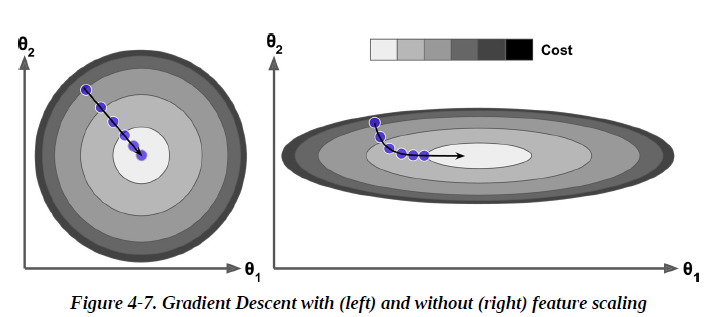

<font color="red">正是因为特征1的值过小，θ1的变化足够大才能影响到代价函数，所以这个碗沿着θ1方向拉长了</font>

如您所见，左侧的“梯度下降”算法直接朝着最小值移动，因此很快就达到了最小值，而在右侧，它首先沿着与全局最小值的方向几乎正交的方向前进，并沿着几乎平坦的山谷行走了一段时间。它将最终到达最小值，但需要很长时间。

**<font color="red" size=4>提示：在使用梯度下降算法时，要确保所有特征都在相同的scale中(可以使用StandardScaler())，否则后期要花费很多时间才能使算法收敛到全局最优点。</font>**

该图还说明了以下事实：训练模型意味着搜索使成本函数最小化的模型参数组合（可能会超过训练集）。这是在模型的参数空间中进行的搜索：模型具有的参数越多，该空间具有的维数就越多，搜索就越困难：在300维大海捞针中搜索针比在3维中更难。幸运的是，由于在线性回归的情况下成本函数是凸的，因此这根针仅位于碗的底部。

**<font size=4>1.2.1批量梯度下降batch gradient descent</font>**

需要计算如果仅稍微改变θ，代价函数将改变多少，这称为偏导数。<br>
下式计算出与参数θ有关的成本函数的偏导数，记为MSE(θ)对θ的偏导数:
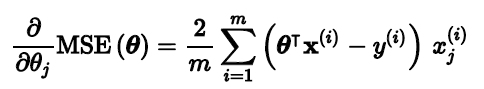

不用单独计算这些偏导数，而是可以使用公式下列一次性计算所有偏导数。梯度向量记为MSE（θ），包含代价函数的所有偏导数（每个模型参数一个）。
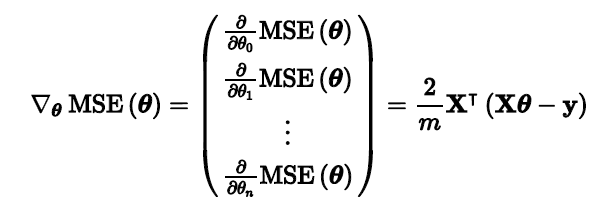

这就是为什么该算法称为“批次梯度下降”的原因：它在每个步骤都使用整批训练数据（实际上，“完全梯度下降”可能是个更好的名称）。 结果，在非常大的训练集上，它的运行速度非常慢。当训练集中有成千上万的特征时，使用梯度下降算法训练线性回归模型比使用正规方程或SVD分解要快得多。

学习率η发挥作用的地方：将梯度矢量乘以η来确定下坡步长的大小：
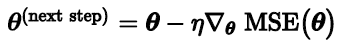

In [26]:
eta = 0.1 #学习率
n_iterations = 1000
m = 100

In [27]:
theta = np.random.randn(2,1) #随机初始化θ

In [28]:
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [29]:
theta

array([[3.74711212],
       [3.15528998]])

三种使用不同学习率的梯度下降方法

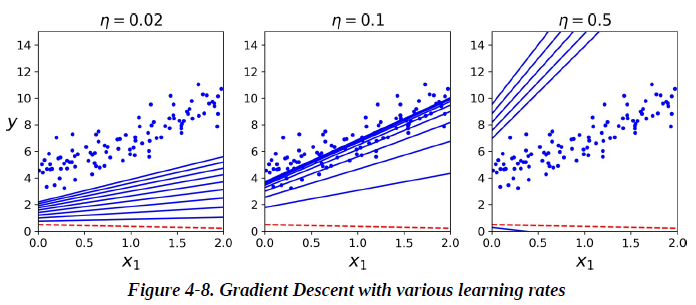

左侧，学习率太低：该算法最终会达到解决方案，但需要很长时间。<br>
在中间，学习率看起来不错：在短短的几次迭代，它就已经收敛到解决方案。<br>
在右边，学习率太高：算法发散，在各处跳跃，实际上在每一步上都离解决方案越来越远

要获得良好的学习率，可以使用网格搜索。但是，你可能希望限制迭代次数，以便网格搜索可以消除收敛时间太长的模型。<br>
如何设置迭代次数。 如果它太低，当算法停止时，您仍将远离最佳解决方案。但是如果它太高，您将浪费时间，而模型参数不再更改。一种简单的解决方案是设置大量的迭代，但是在梯度向量变小时（即当其范数变得小于一个很小的数ϵ（称为公差））时中断算法，因为这种情况发生在梯度下降几乎达到最小值的时候。

**<font color="red">缺点：</font>**<br>
它使用整个训练集来计算每一步的梯度，这在训练集很大时非常慢

**<font size=4>1.2.2随机梯度下降Stochastic Gradient Descent</font>**

相反，随机梯度下降在每一步中从训练集中选择一个随机实例，并仅基于该单个实例来计算梯度值。 显然，一次处理单个实例使该算法更快，因为它每次迭代需要处理的数据很少。 由于每次迭代仅需要在内存中存储一个实例，因此还可以在庞大的训练集上进行训练（随机GD可以实现为核外算法)

另一方面，由于它的随机性，该算法比批量梯度下降的规则性要弱得多：代价函数并不是逐渐降低直到达到最小值，而是不断的反弹，仅平均降低。随着时间的流逝，它最终将非常接近最小值，但是就算到达最小值，它将继续弹跳，而从未稳定下来。因此，一旦算法停止，最终的参数值将是良好的，但不是最佳的。
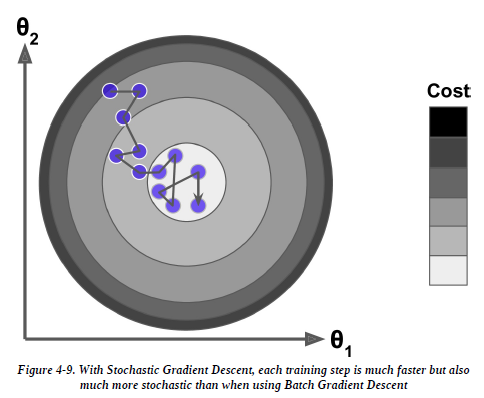

与使用“批量梯度下降”相比，使用“随机梯度下降”时，每个训练步骤要快得多，但也更加随机

当成本函数非常不规则时，这实际上可以帮助算法跳出局部最小值，因此，与“批量梯度下降”相比，“随机梯度下降”有更大的机会找到全局最小值。

因此，随机性可以逃避局部最优，但是不好，因为它意味着算法永远都不能到达最小值。 解决这一难题的一种方法是逐渐降低学习率。<br>
step开始很大（这有助于快速进行并跳出局部最小值），然后变得越来越小，从而使算法能够稳定在全局最小值。 此过程类似于模拟退火，这是一种从退火冶金过程中汲取灵感的算法，在该过程中，熔融金属缓慢冷却。

如果学习速度降低得太快，您可能会陷入局部最小值，甚至冻结到最小值的一半。 如果学习速度降低得太慢，您可能会长时间徘徊在最小值附近

In [30]:
n_epochs = 50#指定迭代次数

In [31]:
t0, t1 = 5, 50 #学习表超参数

In [32]:
def learning_schedule(t):
    return t0 / (t + t1)

In [33]:
theta = np.random.randn(2,1)

In [34]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients

按照惯例，我们会进行m轮迭代。 每个回合称为一个epoch。虽然“批量梯度下降”代码在整个训练集中进行了5000次迭代，但此代码仅在训练集中进行了50次，并达到了一个很好的解决方案：

In [35]:
theta

array([[3.77205373],
       [3.14179634]])

下列图表显示了训练的前20个step（请注意这些步骤有多不规则）
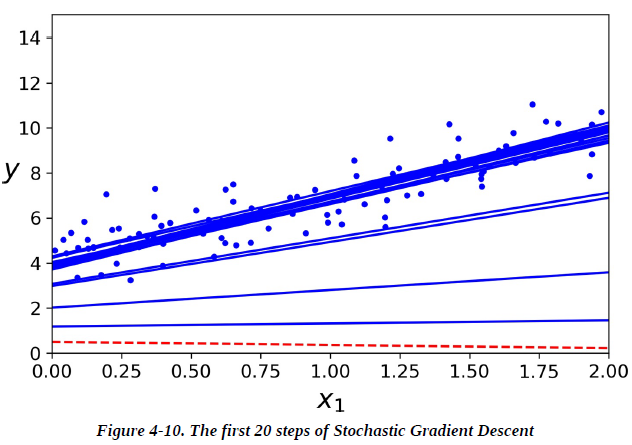

请注意，由于实例是随机选取的，因此某些实例可能每个时期被选取几次，而其他实例则可能根本不被选取。 如果要确保算法在每个时期都遍历每个实例，则另一种方法是对训练集进行混洗（确保同时对输入要素和标签进行混洗），然后逐个实例进行遍历，然后对其再次进行混洗，这样会导致收敛速度很慢。

使用随机梯度下降时，训练实例必须独立且均等分布（IID），以确保平均而言将参数拉向全局最优值。确保这一点的一种简单方法是在训练过程中shuffle实例（例如，随机选择每个实例，或者在每个时期开始时随机排列训练集）。 如果不对实例进行随机排序（例如，如果实例按标签排序），则SGD将首先针对一个标签进行优化，然后针对下一个标签进行优化，以此类推，并且它不会接近全局最小值。

将SGD用于线性回归，可以使用SGDRegressor类，该类默认用于优化平方误差代价函数。以下代码最多运行1,000个epochs（max_iter = 1000），tol = 1e-3即时损耗下降小于0.001。 它使用默认的学习计划（与前一个学习计划不同）以0.1（eta0 = 0.1）的学习率开始。 最后，它不使用任何正则化（penalty = None) 

In [36]:
from sklearn.linear_model import SGDRegressor

In [37]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

查看截距和系数

In [38]:
sgd.intercept_, sgd.coef_

(array([3.73083374]), array([3.16455685]))

**<font size=4>1.2.3小批量梯度下降Mini-batch Gradient Descent</font>**

在每个步骤中，小批量梯度下降不会根据完整的训练集（如Batch GD）或仅基于一个实例（如Stochastic GD）来计算梯度，而是根据完整训练集中的小批量。小批量处理优于随机GD的主要优点是：可以通过矩阵操作的硬件优化来提高性能，尤其是在使用GPU时。

与随机GD相比，该算法在参数空间上的进展不稳定，尤其是对于相当大的小批次。结果就是小批量梯度下降最终将比随机GD行走得更接近最小值-但它可能更难摆脱局部最小值（在遇到局部最小值的问题下，与线性回归不同 ）。

**<font size=4>1.2.4三种梯度下降算法的比较</font>**

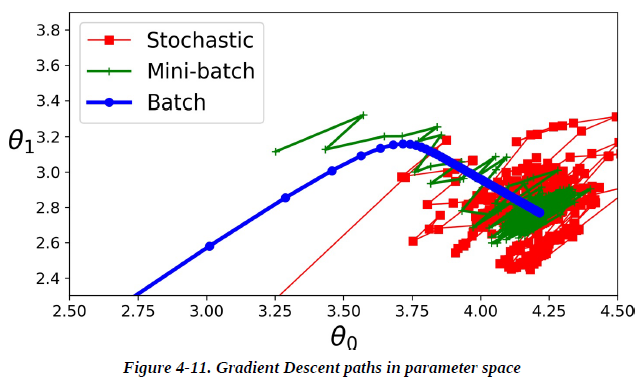

显示了训练期间参数空间中三种梯度下降算法的路径。它们最终都接近最小值，但是批量梯度下降的路径实际上停止在最小值，而随机GD和小批量GD都继续走动。

但是，请不要忘记，批处理GD需要花费很多时间进行每个步骤，并且如果使用适合的学习率处理方式，随机GD和小批量GD也将达到最低要求。

**<font size=5>几种线性回归方法的比较</font>**

其中m是实例数，n是特征数

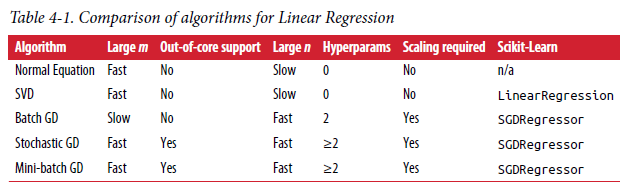

**<font size=5>二、多项式回归</font>**

如果您的数据比直线更复杂怎么办？ 令人惊讶的是，您可以使用线性模型来拟合非线性数据。 一种简单的方法是将每个特征的幂值作为新的特征，然后在此扩展特征数据集上训练线性模型。 这种技术称为多项式回归。

首先，基于简单的二次多项式生成一些数据

In [39]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

Text(0.5,1,'quadratic data')

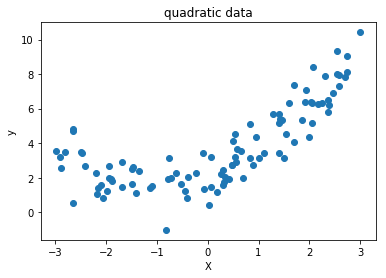

In [40]:
plt.scatter(X.ravel(), y.ravel())
plt.xlabel("X")
plt.ylabel("y")
plt.title("quadratic data")

显然，一条直线永远无法正确拟合该二次数据。因此，让我们使用Scikit-Learn的PolynomialFeatures类可转换我们的训练数据，将训练集中每个特征的平方（二次多项式）添加为新特征（在这种情况下，只有一个特征）：

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures(degree = 2, include_bias=False)

In [43]:
X_poly = poly.fit_transform(X)

In [44]:
X[0]

array([1.46967256])

In [45]:
X_poly[0]

array([1.46967256, 2.15993744])

X_poly现在包含X的原始特征以及该特征的平方

现在可以用LinearRegression模型拟合此扩展训练数据上

In [46]:
lin_reg = LinearRegression()

In [47]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
b = lin_reg.intercept_
b

array([2.1496602])

In [49]:
w = lin_reg.coef_[0]
w

array([1.01428998, 0.48685729])

In [50]:
xtest = np.linspace(-3,3,100)
ytest = b + w[0] * xtest + w[1] * xtest**2

Text(0.5,1,'polynomial regression')

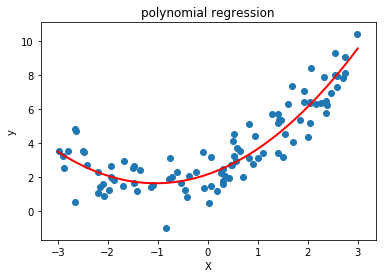

In [51]:
plt.plot(xtest, ytest, linewidth=2, color="red")
plt.scatter(X.ravel(), y.ravel())
plt.xlabel("X")
plt.ylabel("y")
plt.title("polynomial regression")

请注意，当存在多个要素时，多项式回归能够找到要素之间的关系（这是普通线性回归模型无法做到的）.PolynomialFeatures还可以将特征的所有组合到给定的degree。<br>
例如有两个特征a和b，则degree=3的PolynomialFeatures不仅会添加特征：

还会添加：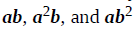

PolynomialFeatures（degree = d）将包含n个特征的数据转换为包含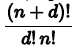个特征的数据

**<font size=5>三、学习曲线</font>**

如果使用的是高阶多项式回归，则与普通线性回归相比，拟合效果可能会更好。

例如，将300degree的多项式模型应用于前面的训练数据，并将结果与纯线性模型和二次模型（二次多项式）进行比较。
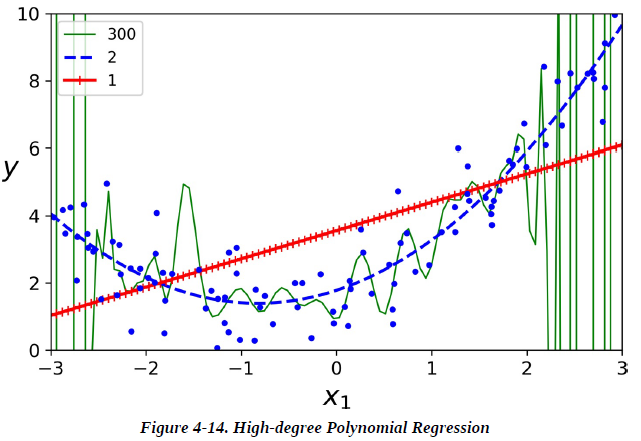

这种高degree多项式回归模型在训练数据上出现了过拟合，而线性模型则欠拟合。在这种情况下，泛化效果最好的模型是二次模型，这是有意义的，因为数据是使用二次模型生成的。<br>
**但总的来说，您将不知道由什么函数生成数据，那么如何确定模型的复杂程度呢？您如何判断模型是否对新数据过拟合or欠拟合？**

可以使用了交叉验证来估计模型的泛化性能。如果模型在训练数据上表现良好，但根据交叉验证socre值的较差，则表明模型过拟合。如果两者均表现不佳，则说明欠拟合。这是一种告诉模型何时过于简单或过于复杂的方法。

还有一种方法是查看学习曲线：这是模型在训练集和验证集上的性能与训练集大小（或训练迭代）的函数关系图。要生成图，请在训练集的不同大小的子集上多次训练模型。以下代码定义了一个函数，该函数在给定一些训练数据的情况下绘制了模型的学习曲线：

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [53]:
def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [],[]
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    size = np.arange(len(X_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

In [54]:
lin_reg = LinearRegression()

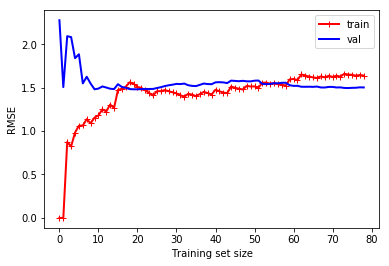

In [55]:
plot_learning_curve(lin_reg, X, y)

很显然，使用线性模型拟合二次数据的效果很不好。<br>
首先，让我们看一下训练数据的性能：当训练集中只有一个或两个实例时，模型可以很好地拟合它们，这就是曲线从零开始的原因。但是，随着将新实例添加到训练集中，模型就不可能完美地拟合训练数据，这既因为数据有噪声，又因为它根本不是线性的。因此，训练数据上的错误会一直上升，直到达到稳定状态为止，此时，将新实例添加到训练集中并不会使RMSE变得更好或更糟。现在，让我们看看验证数据上模型的性能。当在很少的训练实例上训练模型时，它无法正确地归纳，这就是为什么验证误差最初很大的原因。<br>
然后，随着模型显示更多的训练示例，它开始学习，因此验证错误逐渐降低。但是，直线并不能很好地对数据进行建模，因此误差最终会达到一个平稳的高度，非常接近其他曲线。

这些学习曲线是欠拟合模型的典型代表。两条曲线都达到了平稳状态，而且他们的RMSE很近而且很高。

**<font color="red">TIPS</font>:**<br>
如果模型在训练集数据上欠拟合，添加再多的训练集数据也无济于事，可以考虑选择更复杂的模型或者添加更好的特征

看一下同一数据上使用10次多项式回归模型的学习曲线

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())])

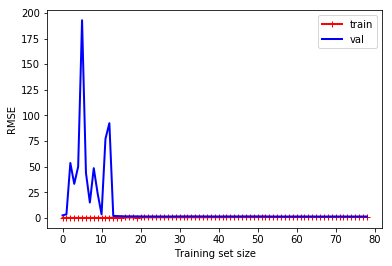

In [58]:
plot_learning_curve(polynomial_regression, X, y)

1. 可以发现在训练集上的误差率很低，接近于0

2. 在训练集上的拟合效果要比测试集好的多，说明模型过拟合。但是，如果使用更大的训练集，则两条曲线将继续接近。

**<font size=5>四、偏差与方差</font>**

模型的泛化误差主要有以下三种：<br>
**<font color="red">偏差：</font>**<br>
这一部分的泛化误差是由于错误的假设所致，例如假设数据是线性的，实际上是数据是二次的。高偏差模型很有可能是由于欠拟合导致。<br>
**<font color="red">方差：</font>**<br>
这部分是由于模型对训练数据的细微变化过于敏感。具有许多自由度的模型（例如高阶多项式模型）可能具有较高的方差，因此可能会过度拟合训练数据。<br>
**<font color="red">不可避免的误差：</font>**<br>
这部分是由于数据本身的噪音。 减少这部分错误的唯一方法是清理数据（例如，修复数据源，例如损坏的传感器，或者检测并删除异常值）。

**增加模型的复杂度通常会增加其方差，减少偏差。相反，降低模型的复杂性会增加其偏差并减少其方差。这就是为什么要进行方差/偏差的权衡。**

**<font size=5>五、正则化线性模型</font>**

降低过拟合风险的一种好方法是对模型进行正则化（即约束模型）：自由度越小，对数据进行过度拟合的难度就越大。 规范多项式模型的一种简单方法是减少多项式次数。

对于线性模型，正则化通常是通过约束模型的权重来实现的。

**<font size=4>5.1 岭回归RidgeRegression</font>**

将正则化项加入代价函数：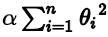

这迫使学习算法不仅要拟合数据，还要使模型权重尽可能小。请注意，仅在训练期间将正则化项添加到代价函数中。训练模型后，使用非正则化的性能指标来评估模型的性能。

训练期间使用的代价函数与用于测试集的性能评估方法有所不同。 除了正则化之外，另一个原因是，良好的代价函数优化后要可导，而用于测试集的性能评估方法要求预测值尽可能接近最终目标。例如，分类器通常使用代价函数（例如对数损失）进行训练，但使用精度/召回率进行评估。

**超参数α控制要对模型进行正则化的量。**<br>
如果α= 0，则岭回归仅是线性回归。<br>
如果α很大，则所有权重最终都非常接近零，结果是一条穿过数据均值的平线。<br>
带正则化项的代价函数：
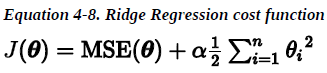

请注意，偏置项θ未正规化（总和从i = 1开始，而不是0）。如果将w定义为特征权重（θ1到θn）的向量，则正则化项等于1/2（∥w∥2），其中∥w∥2表示权重向量的l2范数。 对于梯度下降，只需将αw添加到MSE梯度向量中。

<font color="red">注意：<br>
    在执行Ridge回归之前缩放数据非常重要（例如使用StandardScaler），因为它对输入特征的缩放敏感。 大多数正则化模型都是如此。</font>

使用不同的α值对某些线性数据进行训练的Ridge模型：
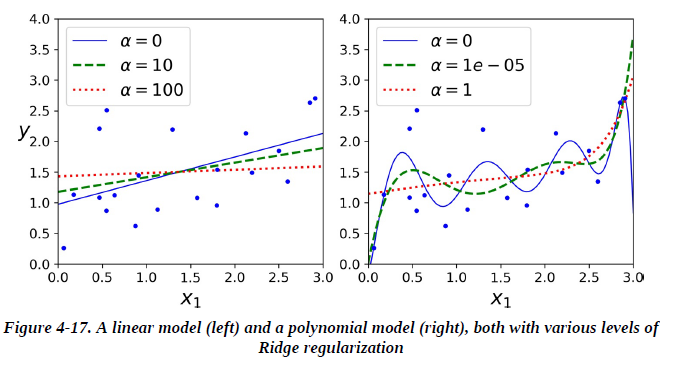

左侧使用较为平稳的Ridge模型，从而进行线性预测。<br>
在右侧，首先使用PolynomialFeatures（degree = 10）扩展数据，然后使用StandardScaler对其进行缩放，最后将Ridge模型应用于结果特征：这是带有Ridge正则化的多项式回归。<br>
**<font color="red">请注意，α的增加如何导致更平坦的预测（即不太极端，更合理），从而降低了模型的方差，但会增加偏差。</font>**

与线性回归一样，我们可以通过计算闭合形式的方程或通过执行梯度下降来执行岭回归。利弊是相同的。 <br>
带岭回归正则化项的正规方程：<br>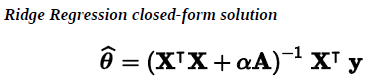
其中A是(n+1)×(n+1)的单位矩阵

带正则化的Ridge回归，使用André-LouisCholesky的矩阵分解技术：

In [59]:
from sklearn.linear_model import Ridge

In [60]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [61]:
ridge_reg.predict([[1.5]])

array([[5.08999716]])

使用随机梯度下降：

In [62]:
sdg_reg = SGDRegressor(penalty="l2")
sdg_reg.fit(X, y.ravel())
sdg_reg.predict([[1.5]])

array([5.07186039])

惩罚超参数设置要使用的正则项的类型。指定“ l2”表示您希望SGD向代价函数添加一个正则化项，使其等于权重向量ℓ2范数的平方的一半：这就是Ridge回归。

**<font size=4>5.2 锁套回归LassoRegression</font>**

使用l1范数加入正则化项，加入θ的绝对值：<br>
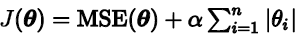

下图使用了与Rigde回归相同的数据，但是用Lasso模型代替了Ridge模型，并使用了较小的α值。<br>
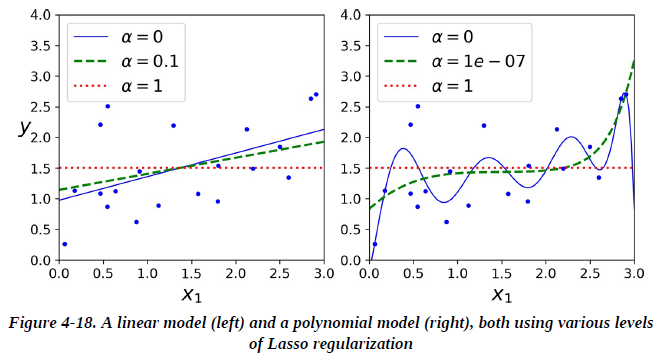

拉索回归的一个重要特征是，它倾向于消除最不重要特征的权重(即将其设置为零)。例如，右侧图中的虚线（α= 1e-7）看起来是二次方的，几乎是线性的：高阶多项式特征的权重都等于零。<br>
换句话说，Lasso回归自动执行特征选择并输出稀疏模型（即具有很少的非零特征权重）。

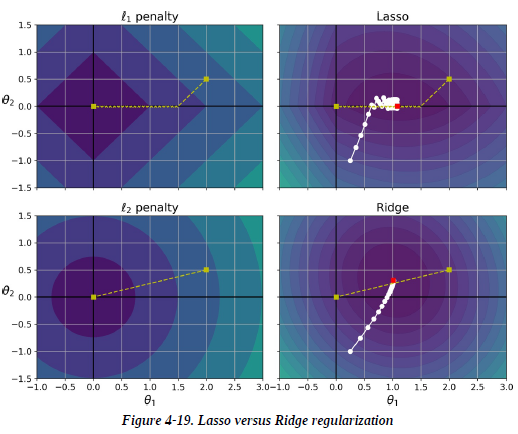

轴代表两个模型参数，背景轮廓代表不同的损失函数。如左上角的图所示，轮廓线表示ℓ1loss（|θ1| + |θ2|），当您靠近任何轴时，它会线性下降。例如，如果将模型参数初始化为θ1= 2和θ2= 0.5，则运行Gradient Descent会使两个参数均等地递减（如黄色虚线所示）。因此θ2首先会达到0（因为开始时更接近0）。之后，梯度下降将顺着沟槽向下滚动，直到其达到θ1= 0（有一点反弹，因为ℓ1的梯度永远不会接近0：对于每个参数，它们为–1或1）。

在右上方的图中，等高线代表Lasso的代价函数（即MSE成本函数加上ℓ损失）。白色小圆圈显示了梯度下降用于优化某些在θ1= 0.25和θ2= –1周围初始化的模型参数的路径：再次注意该路径如何快速到达θ2= 0，然后滚落下水道并最终弹起围绕全局最优值（用红色正方形表示）。如果我们增加α，则全局最优值将沿黄色虚线向左移动，而如果我们降低α，则全局最优值将向右移动（在本示例中，非正则化MSE的最优参数为θ1= 2和θ2= 0.5） 。

底部的两个图显示的是同一件事，但要加ℓ2惩罚。在左下图中，您可以看到ℓ2损失随距原点的距离而减小，因此Gradient Descent只是沿一条直线到达该点。在右下图中，等高线代表岭回归的代价函数（即，MSE代价函数加ℓ损失）。 与Lasso有两个主要区别。 首先，随着参数接近全局最优值，梯度会变小，因此“梯度下降”自然会减慢速度，这有助于收敛（因为周围没有反弹）。其次，当您增加α时，最佳参数（用红色正方形表示）越来越接近原点，但它们从未被完全消除。

为了避免使用Lasso时梯度下降最终在最佳值附近反弹，您需要在训练过程中逐渐降低学习率（它仍然会在最佳值附近反弹，但是步长会越来越小，因此会收敛）。

套索成本函数在θi= 0时是不可微的（对于i = 1，2，…，n），但是如果您使用次梯度矢量g代替任何θ= 0，则梯度下降仍然可以正常工作。<br>
显示了次梯度向量方程式，可用于带有套索代价函数的梯度下降：
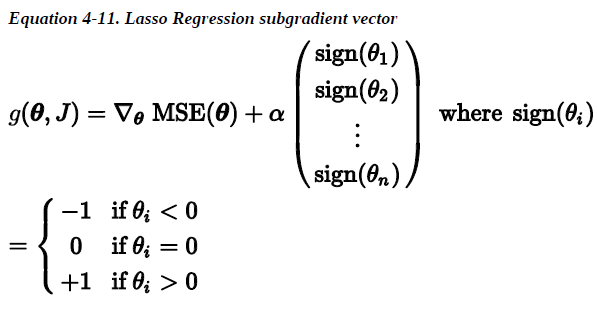

In [63]:
from sklearn.linear_model import Lasso

In [64]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])


array([5.04934017])

使用SGD梯度下降回归，只需将penalty设置为l1即可

In [65]:
sgd_l1 = SGDRegressor(penalty="l1")
sgd_l1.fit(X, y.ravel())
sgd_l1.predict([[1.5]])

array([5.0694214])

**<font size=4>5.3 弹性网络Elastic Net</font>**

弹性网是介于Ridge回归和Lasso回归之间的中间地带。正则项是Ridge和Lasso的正则项的简单混合，您可以控制混合比r。当r = 0时，Elastic Net等效于Ridge回归，而当r = 1时，Elastic Net等效于Lasso回归。
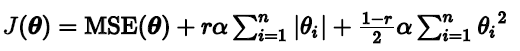

那么什么时候应该使用普通的线性回归（即不进行任何正则化），Ridge，Lasso或Elastic Net？<br>至少总是要有一点正则化,因此通常应该避免纯线性回归。<br> 
Ridge是一个很好的默认选择，但是，如果您怀疑只有少数几个功能有用，那么您应该选择Lasso或Elastic Net，因为它们会把无用功能的权重降低到零。<br>
通常，Elastic Net优于Lasso，因为当特征的数量大于训练实例的数量或多个特征紧密相关时，Lasso的行为可能会不稳定。

In [66]:
from sklearn.linear_model import ElasticNet

In [67]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X,y)
elastic.predict([[1.5]])

array([5.05018185])

**<font size=5>六、提前停止</font>**

另一种正规化迭代学习算法（例如Gradient Descent）的方法是：一旦验证误差达到最小值，就停止训练。 这称为提前停止。 <br>
下图显示了使用批量梯度下降训练的复杂模型（在本例中为高阶多项式回归模型）。随着epoch的增长，训练集上的预测误差（RMSE）以及验证集上的预测误差也将下降。 过了一会儿，验证错误停止减少并开始回升。这表明模型已经开始过拟合训练数据。通过提早停止，您只需在验证错误达到最小值时就停止训练。这项简单有效的正则化技术使Geoffrey Hinton称之为“美丽的免费午餐”。
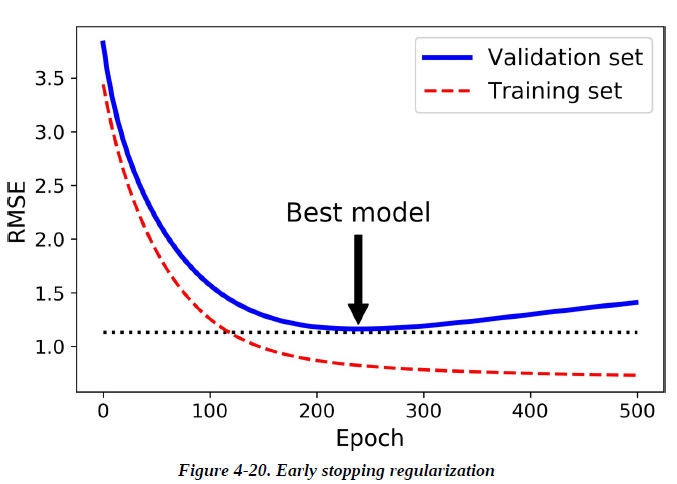

使用随机和小批量梯度下降时，曲线不是那么平滑，并且可能很难知道您是否达到了最小值。 一种解决方案是仅在验证误差超过最小值一段时间后停止（当您确信模型不会做得更好时），然后将模型参数回滚到验证误差最小的点 。

In [68]:
from sklearn.base import clone

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
#准备数据
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

NameError: name 'X_train' is not defined

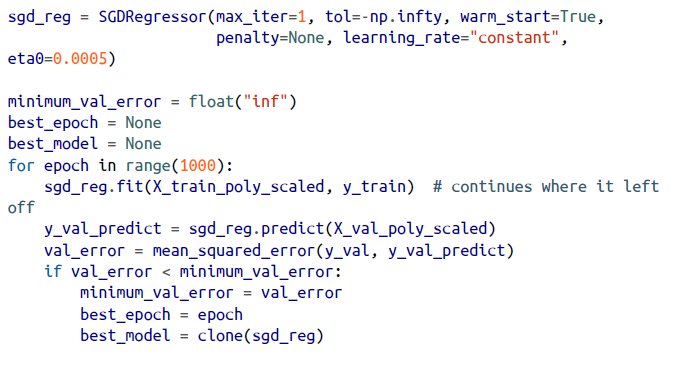

<font color="red">请注意，在使用warm_start = True的情况下，当调用fit（）方法时，它将继续从中断处开始训练，而不是从头开始。</font>

**<font size=5>七、LogisticRegression逻辑回归</font>**

可以将一些回归算法用于分类（反之亦然）。 Logistic回归（也称为Logit回归）通常用于估计实例属于特定类别的概率（例如，此电子邮件是垃圾邮件的概率是多少？）。如果估计的概率大于50％，则该模型会预测该实例属于该类（称为正类，标记为“ 1”），否则它将预测不属于该类（即，它属于负类） ，标记为“ 0”）。 这使其成为二进制分类器。

**<font size=4>7.1 估计概率</font>**

那么Logistic回归如何工作？ 就像线性回归模型一样，逻辑回归模型计算输入要素的加权总和（加上偏差项），而不是像线性回归那样直接输出结果，而是通过一个函数计算：
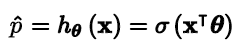

函数σ（）的是一个S型函数，输出一个介于0和1之间的数字。其定义如：
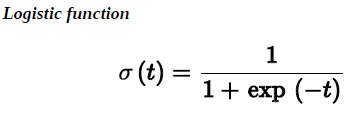

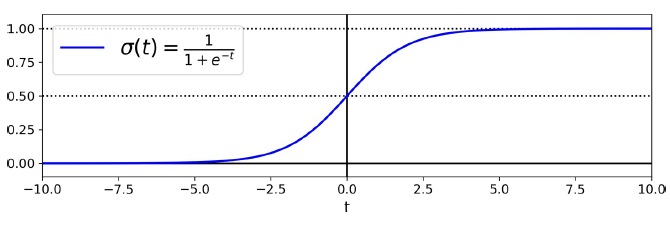

一旦Logistic回归模型估算出实例x属于正类的概率=h(x)，它就可以轻松地做出预测。
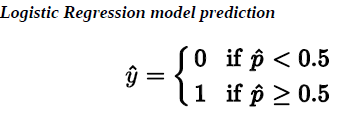

t常称为logit：logit(p) = log p/(1-p)是Logistic回归的反函数 

**<font size=4>7.2 训练与代价函数</font>**

现在您知道了Logistic回归模型如何估计概率并做出预测。<br>
但是如何训练？ 训练的目的是设置参数向量θ，以便模型估计正例（y = 1）的高概率和负例（y = 0）的低概率。<br>
对于单个训练实例x，代价函数如下列公式所示。
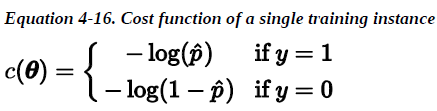

这样的代价函数很有意义，因为–log（t）在t接近0时会变得非常大，因此如果模型估计正实例的概率接近于0，则成本将很大，如果模型估计为0，则成本也会非常大。 反例的概率接近1.<br>
另一方面，当t接近1时–log（t）接近0，因此如果估计的可能性（对于否定实例）接近0或对于肯定实例接近1，则成本将接近0， 这正是我们想要的。

整个训练集的成代价函数是所有训练实例的平均代价：
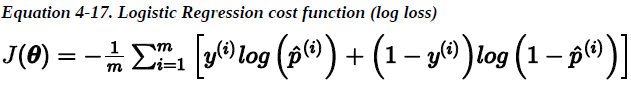

坏消息是，没有已知的闭合形式的方程式可以计算出使该代价函数最小的θ值（不存在与正规方程式等效的情况）。<br> 
好消息是，此代价函数是凸函数，因此可以保证“梯度下降”（或其他优化算法）可以找到全局最小值（如果学习率不太大且等待时间足够长）。<br>
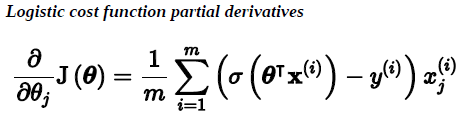

该方程式非常类似于线性回归的导数：对于每个实例，它计算预测误差并将其乘以该实例的第j个特征值，然后计算所有训练实例的平均值。 一旦有了包含所有偏导数的梯度向量，就可以在“批梯度下降”算法中使用它。对于随机GD，您一次只能使用一个实例，对于Minibatch GD，您一次可以使用一个小批量。

**<font size=4>7.3 决策边界</font>**

让我们使用鸢尾花数据集来说明Logistic回归。 这是一个著名的数据集，其中包含三种不同物种的150个鸢尾花的萼片和花瓣的长度和宽度
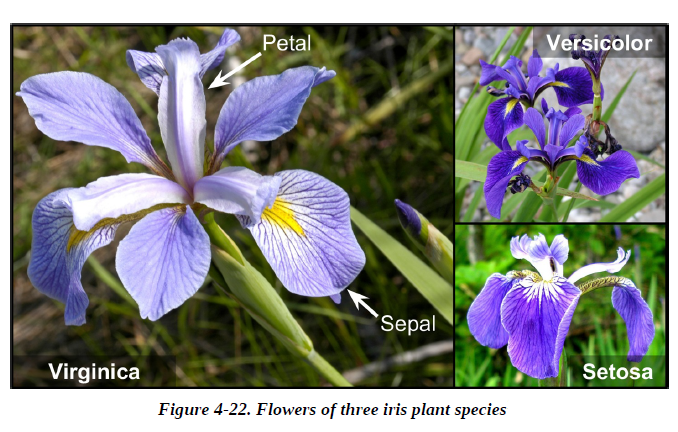

尝试建立一个仅基于花瓣宽度特征来检测鸢尾花类型的分类器。 首先让我们加载数据：

In [72]:
from sklearn.datasets import load_iris

In [73]:
iris = load_iris()

查看都有哪些特征

In [74]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [75]:
X = iris.data[:,3:]

In [76]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

将类别为virginica的鸢尾花标记为1

In [77]:
y = (iris.target == 2).astype(np.int)

In [78]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X, y)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)

In [80]:
y_proba = logistic.predict_proba(X_new)

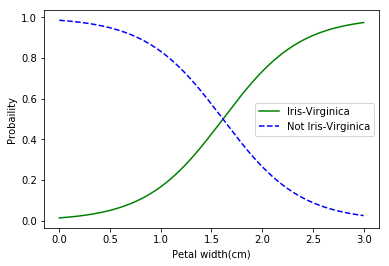

In [81]:
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virginica")
plt.xlabel("Petal width(cm)")
plt.ylabel("Probaility")
plt.legend()

鸢尾花的花瓣宽度（以三角形表示）范围为1.5厘米至2.5厘米，而其他鸢尾花（以正方形表示）的花瓣宽度通常较小，范围为0.1厘米至1.6厘米。请注意，在1.6cm处重叠。<br>
高于约2cm时，分类器对花是Virginica很有信心（对于该类别，该花输出很高的可能性），而低于1 cm时，则很有信心说它不是Virginica（对“Not Iris-Virginica”的可能性很高。）<br>
而在这中间的预测，则不确定。但是，如果要求它预测类（使用predict（）方法而不是predict_proba（）方法），它将返回最有可能的类。因此，在1.6厘米左右有一个决策边界，两个概率均等于50％：如果花瓣宽度大于1.6厘米，则分类器将预测该花为鸢尾花，否则将预测为 不是（即使不是很确信）

In [82]:
logistic.predict([[1.7], [1.5]])

array([1, 0])

下图显示了相同的数据集，但是这次显示了两个特征：花瓣的宽度和长度。训练后，逻辑回归分类器可以基于这两个特征，估计一朵新花是Virginica的可能性。 虚线表示模型估算出50％概率的点：这是模型的决策边界。
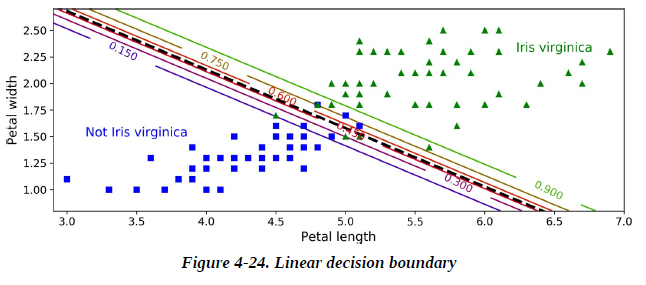

每条平行线代表模型输出特定概率的点，范围从15％（左下）到90％（右上)。根据该模型，右上角以外的所有花朵都有超过90％的机会预测为Virginica。

**Logistic回归也可以使用l1和l2级正则化，sklearn通常默认使用l2级正则化**

**<font color="red">注意：</font>**<br>
控制Scikit Learn LogisticRegression模型的正则化强度的超参数不是alpha（与其他线性模型一样），而是它的倒数：C。C的值越高，对模型的正则化程度越弱。

**<font size=5>八、Softmax回归</font>**

Logistic回归模型可以推广为直接支持多个类，而不必训练和组合多个二进制分类器（如第3章所述）。 这称为Softmax回归或多项逻辑回归。<br>
这个想法很简单：当给定实例x时，Softmax回归模型首先为每个类别k计算得分sk(x），然后通过将Softmax函数（也称为归一化指数）应用于得分来估计每个类别的概率 。 计算s（x）的方程应该看起来很熟悉，就像线性回归预测的方程一样.
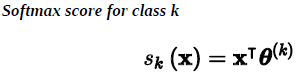

注意，每个类都有其自己的专用参数向量θ。 所有这些向量通常作为行存储在参数矩阵Θ中。

一旦为实例x计算了每个类别的分数，就可以通过softmax函数公式利用这些分数来估计该实例属于类别k的概率。该函数计算每个分数的指数，然后对其进行归一化（除以所有指数的总和）。
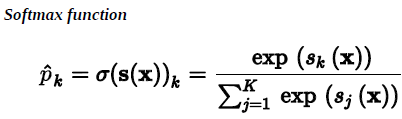

<font size=5>·</font>k是类别数<br>
<font size=5>·</font>s(x)是一个向量，其中包含实例x的对每个类的预测分数。<br>
<font size=5>·</font>σ(s(x))k是实例x属于类别k的估计概率

就像Logistic回归分类器一样，Softmax回归分类器预测具有最高估计概率的类（简单来说就是得分最高的类）

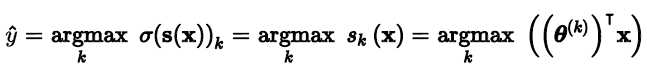

argmax运算符返回使函数变量的最大值。在此等式中，它返回使估计概率σ(s(x))最大化的k的值。

**Softmax回归分类器一次只能预测一个类别**（即，它是多重类别，而不是多重输出），因此它只能与互斥类别（例如不同类型的植物）一起使用。 您无法使用它在一张照片中识别多个人。

既然已经知道模型是如何估计概率并做出预测的，那么让我们来看看训练过程。 目的是要有一个模型来估计目标类别的概率很高（因此对其他类别的概率很小）。 最小化公式中所示的代价函数（称为交叉熵）应该会达到这个目标，因为当估计目标类别的可能性较低时，它将对模型造成不利影响。<br>** 交叉熵通常用于衡量一组估计的类别概率与目标类别的匹配程度。**

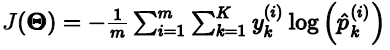

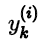
是第i个实例属于类别k的目标概率。通常，它等于1或0，具体取决于实例是否属于该类。

请注意，当只有两个类别（K = 2）时，此成本函数等效于Logistic回归的成本函数（对数损失）。
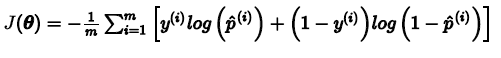

<font size=5>交叉熵cross entropy</font>

交叉熵起源于信息论。 假设您想每天高效地传输有关天气的信息。 如果有八个选项（晴天，下雨等），则可以使用3位对每个选项进行编码，因为2**3=8。

但是，如果您认为几乎每天都晴天，则编码“晴天”的效率会更高。”（仅1位（0）），其他7个选项仅4位（以1开头）。交叉熵衡量的是每个选项实际发送的平均位数。如果您对天气的假设是完美的，则交叉熵将等于天气本身的熵（即其固有的不可预测性）。但是，如果您的假设是错误的（例如，如果经常下雨），则交叉熵将增加一个称为Kullback-Leibler（KL）散度的量。将两个概率分布p和q之间的交叉熵定义为:
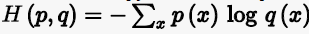

该代价函数相对于θ的梯度向量：
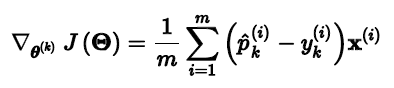

让我们使用Softmax回归将鸢尾花分为三类。 Scikit-Learn的LogisticRegression在两个以上的类上进行训练时，默认情况下使用“一对多”，但是您可以将multi_class超参数设置为“multinomial”，以将其切换为SoftmaxLogistic回归。还必须指定一个支持Softmax回归的求解器，例如“ lbfgs”求解器.默认情况下，s使用ℓ2正则化，可以使用超参数C进行控制： 

In [83]:
X = iris["data"][:,(2,3)]
y = iris.target

In [84]:
softmax = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)

In [85]:
softmax.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
softmax.predict([[5,2]])

array([2])

Iris virginica (class 2) with 94.2% probability (or Iris versicolor with 5.8%probability)

In [87]:
softmax.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

最终的决策边界，由背景色表示。注意，任何两个类之间的决策边界都是线性的。 该图还显示了由Versicolor类鸢尾花的概率（例如，标有0.450的线表示45％的概率边界）。注意，模型可以预测估计概率低于50％的类。例如，在所有决策边界都满足的点上，所有类别的估计概率相等，均为33％。

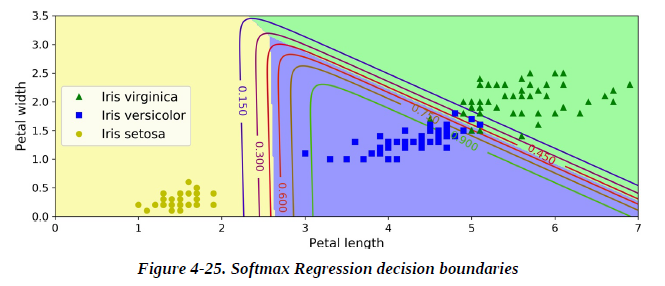